# **Capstone Project - The Battle of the Districts**

### Applied Data Science Capstone by IBM/Coursera

## **Table of contents** 


* [Introduction: Business Problem]()
* [Data]()
* [Methodology]()
* [Analysis]()
* [Results and Discussion]()
* [Conclusion]()




##  **Introduction: Business Problem**

This project aims to select the **Unsafe District** in San Francisco based on the **total crimes**, explore the **District´s** and finally cluster them using **k-mean clustering**.

This report will be targeted to people who are looking to **relocate to San Francisco**. Inorder to finalise a Disctrict, safety is considered as a top concern when moving to a new place. If you don’t feel safe in your own home, you’re not going to be able to enjoy living there. The crime statistics will provide an insight into this issue.

We will focus on the **unsafe districts** and explore **the total number of crimes** as well **the 5 unsafe districts** and **the total crimes per category**, in that way the people can visualize the kind of insecurity per district.

## **Data** 

Based on definition of our problem, factors that will influence our decision are:

* The total number of crimes commited in each of the District.
* The 5 most unsafe districts.
* The total crimes per category.

Following data sources will be needed to extract/generate the required information:

* [Part 1: Preprocessing a real world data set from Kaggle showing the San Francisco Crimes:]() A dataset consisting of the crime statistics of each District in San Francisco obtained from Kaggle





**Part 1: Preprocessing a real world data set from Kaggle showing the San Francisco Crimes**

### **About this file**

* Police_Department_Incidents_-_Previous_Year__2016: This File contains the information about the Crime rates in different regions of San Francisco with some other important aspects related to crime.
* IncidntNum: Incident Number
* Category: Category of Crime
* Descript: Description of Crime
* DayOfWeek: Day of Week when the crime happened
* Date: Date
* Time: Time
* PdDistrict: District
* Resolution: Kind of Punishment given to the criminal to resolve the case.
* Address: Address where the crime scene happened.
* X: Latitude of the crime Location

* Data set URL: https://www.kaggle.com/roshansharma/sanfranciso-crime-dataset

**Import necessary libraries**

In [2]:
!pip install beautifulsoup4
#-c conda-forge
#!conda install -c anaconda beautifulsoup4


print("[yes]")


     |████████████████████████████████| 122kB 9.9MB/s eta 0:00:01
[yes]


In [3]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from bs4 import BeautifulSoup # library for web scrapping  

!conda install -c conda-forge geocoder --yes
import geocoder

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    click-7.1.2                |     pyh9f0ad1d_0          64 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    future-0.18.2              |   py36h9f0ad1d_1         714 KB  conda-forge
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    pysocks-1.7.1              |   py36h9f0ad1d_1          27 KB  conda-forge
    r

**Define Foursquare Credentials and Version**

In [4]:
CLIENT_ID = 'KEM2IH2NSIW0RGMJT4N32DUHCUM5QCZGYYYIJOSVGF1INRWX' # your Foursquare ID
CLIENT_SECRET = 'AYJMMOUCT4NCRONQF13ZB15SVLX4ZRUUNY0NTGZCF04SKYVS' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: KEM2IH2NSIW0RGMJT4N32DUHCUM5QCZGYYYIJOSVGF1INRWX
CLIENT_SECRET:AYJMMOUCT4NCRONQF13ZB15SVLX4ZRUUNY0NTGZCF04SKYVS


In [78]:
pwd


'/resources'

In [79]:
ls

 Capstoneproject.ipynb
 Segmenting-and-Clustering-Neighborhoods-in-Toronto-Part-1-Copy1.ipynb
 Segmenting-and-Clustering-Neighborhoods-in-Toronto-Part-3.ipynb
 Untitled.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
 Untitled3.ipynb
 assesment1.ipynb
 data/
'final project'/
 labs/
 toronto.csv


**Read in the dataset**

In [5]:
# Read in the data 
df = pd.read_csv("/resources/final_project/Police_Department_Incidents_-_Previous_Year__2016_.csv",encoding='ISO-8859-1')

In [6]:
# View the top rows of the dataset
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


**Accessing the crime rates (2016)**

In [7]:
# Reset the index and dropping the previous index
df = df.reset_index(drop=True)

In [8]:
# Shape of the data frame
df.shape

(150500, 13)

In [9]:
# View the top of the dataset 
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


**Change the column names**

In [10]:
df.columns = ['Incidnt_Num', 'Category','Descript','Day_Of_Week','Date','Time','Pd_District','Resolution','Address','X','Y','Location','PDLD']
df.head()

,Incidnt_Num,Category,Descript,Day_Of_Week,Date,Time,Pd_District,Resolution,Address,X,Y,Location,PDLD
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [11]:
# View the information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Incidnt_Num  150500 non-null  int64  
 1   Category     150500 non-null  object 
 2   Descript     150500 non-null  object 
 3   Day_Of_Week  150500 non-null  object 
 4   Date         150500 non-null  object 
 5   Time         150500 non-null  object 
 6   Pd_District  150499 non-null  object 
 7   Resolution   150500 non-null  object 
 8   Address      150500 non-null  object 
 9   X            150500 non-null  float64
 10  Y            150500 non-null  float64
 11  Location     150500 non-null  object 
 12  PDLD         150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


**Total number of crimes in each District**

In [12]:
df['Pd_District'].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: Pd_District, dtype: int64

**The total crimes per category**

In [13]:
df['Descript'].value_counts()

GRAND THEFT FROM LOCKED AUTO             17741
LOST PROPERTY                             4596
AIDED CASE, MENTAL DISTURBED              4566
PETTY THEFT OF PROPERTY                   4416
MALICIOUS MISCHIEF, VANDALISM             4262
                                         ...  
IMPERSONATING FIRE DEPARTMENT MEMBER         1
PERMIT VIOLATION, SECOND-HAND DEALER         1
VIN SWITCH                                   1
GRAND THEFT BY PROSTITUTE                    1
DEATH, NON-MANSLAUGHTER AUTO ACCIDENT        1
Name: Descript, Length: 726, dtype: int64

**Pivoting the table to view the incident num. of each category and District**

In [14]:
San_francisco = pd.pivot_table(df,values=['Incidnt_Num'],
                               index=['Pd_District'],
                               columns=['Category'],
                               aggfunc=np.sum,fill_value=0)
San_francisco.head()   

Incidnt_Num                                                     \
Category           ARSON       ASSAULT BAD CHECKS     BRIBERY      BURGLARY   
Pd_District                                                                   
BAYVIEW      11392647714  284979264583  652389707  3210396255   83685734659   
CENTRAL       4655785651  190699712987  481357567   482387767  103667946182   
INGLESIDE     3530917156  241846983101  321402745  1282909749   85708892344   
MISSION       7385678419  338812680662  321050661  1604927732  127449033579   
NORTHERN      4334203837  246669136734  641582641   641318772  129083605436   

                                                                          \
Category    DISORDERLY CONDUCT DRIVING UNDER THE INFLUENCE DRUG/NARCOTIC   
Pd_District                                                                
BAYVIEW             7874944446                  4336015810   52476255282   
CENTRAL             5138079312                  4987625894   33242599963   
INGLESIDE           2256333579                  5145326749   30649549861   
MISSION            27484461810                  9806798288  102563913353   
NORTHERN           19917413439                  6589419982   84608944978   

                                       ...                             \
Category     DRUNKENNESS EMBEZZLEMENT  ... SEX OFFENSES, NON FORCIBLE   
Pd_District                            ...                              
BAYVIEW       4336245669   3720517876  ...                  321538972   
CENTRAL       8316882542   3384065641  ...                          0   
INGLESIDE     2887179884   1133708299  ...                  472146905   
MISSION      16212644780   3892784868  ...                  482247221   
NORTHERN      9456570269   1455559003  ...                  481546645   

                                                                   \
Category    STOLEN PROPERTY     SUICIDE SUSPICIOUS OCC       TREA   
Pd_District                                                         
BAYVIEW          9472480227   642601559    98013972271          0   
CENTRAL         25074247628  1605769388    93255078739          0   
INGLESIDE        8982508359  2569678168    84742373819  160783865   
MISSION         16690895694   482233839   151885455500          0   
NORTHERN        19721723909  2249866197    96410347529          0   

                                                                    \
Category        TRESPASS     VANDALISM VEHICLE THEFT      WARRANTS   
Pd_District                                                          
BAYVIEW      20070513458  172203715716  173715631738   87934351241   
CENTRAL      27770039499  186849287837   77266541658   78478743594   
INGLESIDE    11885088084  123319296004  146958376115   49235563833   
MISSION      66187593645  176290617320  149764342353  172203673472   
NORTHERN     43041578904  195211100882  118705707615  100018857661   

                          
Category     WEAPON LAWS  
Pd_District               
BAYVIEW      49133371614  
CENTRAL      19606228082  
INGLESIDE    25182641774  
MISSION      44630942090  
NORTHERN     21030882508  

[5 rows x 39 columns]

In [15]:
# Reset the index
San_francisco.reset_index(inplace = True)

In [16]:
# Shape of the data set 
San_francisco.shape

(10, 40)

## **Methodology**

The methodology in this project consists of two parts:
* [Exploratory Data Analysis:]() Visualise the crime rates in the San Francisco Discticts to idenity the 5 most unsafe Disctrict 
* [Modelling:]()To help poeple find the unsafe District, we will be clustering similar districts using K-means clustering which is a form of unsupervised machine learning algorithm that clusters data based on predefined cluster size. We will use a cluster size of 5 for this project that will cluster the 10 Districts into 5 clusters. The reason to conduct a K-means clustering is to cluster Districts with similar number of crimes together, in that way the people can shortlist the area of their interest based on the unsafe districts. 



**Descriptive statistics of the data**

In [17]:
df.head()

,Incidnt_Num,Category,Descript,Day_Of_Week,Date,Time,Pd_District,Resolution,Address,X,Y,Location,PDLD
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [18]:
df.describe()

,Incidnt_Num,X,Y,PDLD
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


In [19]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.1


**Check if the column names are strings**

In [20]:
df.columns = list(map(str, df.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df.columns)

True

**Preparing db to Visualize the five boroughs with the highest number of crimes**


In [21]:
df['Pd_District'].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: Pd_District, dtype: int64

**Making a new Data frame with the Number if crimes** 

In [22]:
Pd_District = ['SOUTHERN','NORTHERN','MISSION','CENTRAL','BAYVIEW','INGLESIDE',
'TARAVAL','TENDERLOIN','RICHMOND','PARK']

number_of_crimes = [28445,20100,19503,17666,
          14303,11594,11325,9942,
          8922,8699]
df_pl = {'Pd_District': Pd_District,'number_of_crimes':number_of_crimes}
kut_neig = pd.DataFrame(data=df_pl, columns=['Pd_District', 'number_of_crimes'], index=None)
kut_neig

,Pd_District,number_of_crimes
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


**Sort the total crimes in descenting order to see 5 Districts with the highest number of crimes**

In [23]:
kut_neig.sort_values(['number_of_crimes'], ascending = False, axis = 0, inplace = True )

df_top5 = kut_neig.head() 
df_top5

,Pd_District,number_of_crimes
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303


**Visualize the five Disctricts with the highest number of crimes**

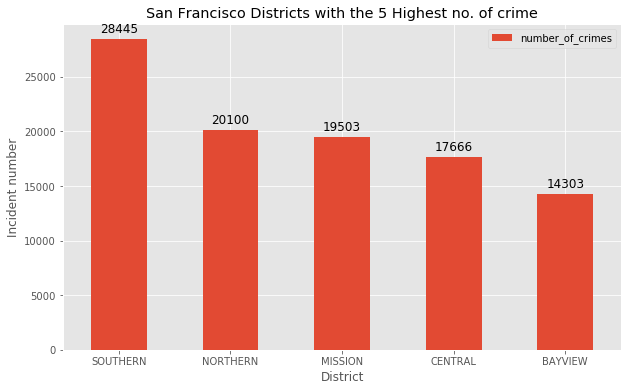

In [24]:
df_tt = df_top5[['Pd_District','number_of_crimes']]

df_tt.set_index('Pd_District',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Incident number') # add to x-label to the plot
ax.set_xlabel('District') # add y-label to the plot
ax.set_title('San Francisco Districts with the 5 Highest no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12
               )

plt.show()

**Sort the total crimes in ascending order to see 5 boroughs with the least number of crimes**

In [25]:
kut_neig.sort_values(['number_of_crimes'], ascending = True, axis = 0, inplace = True )

df_least = kut_neig.head() 
df_least

,Pd_District,number_of_crimes
9,PARK,8699
8,RICHMOND,8922
7,TENDERLOIN,9942
6,TARAVAL,11325
5,INGLESIDE,11594


**Visualize the five Disctricts with the highest number of crimes**

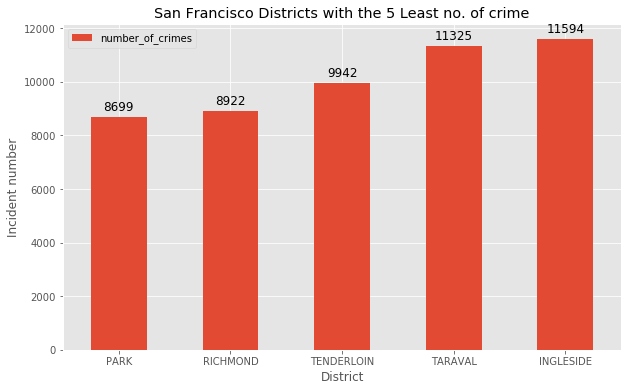

In [26]:
df_t1 = df_least[['Pd_District','number_of_crimes']]

df_t1.set_index('Pd_District',inplace = True)

ax = df_t1.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Incident number') # add to x-label to the plot
ax.set_xlabel('District') # add y-label to the plot
ax.set_title('San Francisco Districts with the 5 Least no. of crime') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 12
               )

plt.show()

**Making a new Data Frame with Latitude and Longitude**

In [27]:
Pd_District = ['SOUTHERN','NORTHERN','MISSION','CENTRAL','BAYVIEW','INGLESIDE',
'TARAVAL','TENDERLOIN','RICHMOND','PARK']

number_of_crimes = [28445,20100,19503,17666,
          14303,11594,11325,9942,
          8922,8699]

Latitude = [-122.403405,-122.426077,-122.406870,-122.400909,-122.388856,-122.432326,-122.477960,-122.412971,-122.507750,-122.449752]
Longitude = [37.775421,37.788019,37.757290,37.791643,37.729981,37.729271,37.745739,37.785788,37.771494,37.764430]

	

df_ll = {'Pd_District': Pd_District,'number_of_crimes':number_of_crimes,'Latitude':Latitude,'Longitude':Longitude}
lalo = pd.DataFrame(data=df_ll, columns=['Pd_District', 'number_of_crimes','Latitude','Longitude'], index=None)
lalo

,Pd_District,number_of_crimes,Latitude,Longitude
0,SOUTHERN,28445,-122.403405,37.775421
1,NORTHERN,20100,-122.426077,37.788019
2,MISSION,19503,-122.406870,37.757290
3,CENTRAL,17666,-122.400909,37.791643
4,BAYVIEW,14303,-122.388856,37.729981
5,INGLESIDE,11594,-122.432326,37.729271
6,TARAVAL,11325,-122.477960,37.745739
7,TENDERLOIN,9942,-122.412971,37.785788
8,RICHMOND,8922,-122.507750,37.771494
9,PARK,8699,-122.449752,37.764430


### **Modelling**

In [28]:
lalo['number_of_crimes'] = lalo['number_of_crimes'].astype(float)
lalo.head()

,Pd_District,number_of_crimes,Latitude,Longitude
0,SOUTHERN,28445.0,-122.403405,37.775421
1,NORTHERN,20100.0,-122.426077,37.788019
2,MISSION,19503.0,-122.406870,37.757290
3,CENTRAL,17666.0,-122.400909,37.791643
4,BAYVIEW,14303.0,-122.388856,37.729981


In [29]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

kut_grouped_clustering = lalo.drop('Pd_District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kut_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 1, 1, 4, 0, 0, 3, 3, 3], dtype=int32)

In [30]:
# add clustering labels
lalo.insert(0, 'Cluster Labels', kmeans.labels_)

**Visualize the clusters**

In [31]:
lalo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cluster Labels    10 non-null     int32  
 1   Pd_District       10 non-null     object 
 2   number_of_crimes  10 non-null     float64
 3   Latitude          10 non-null     float64
 4   Longitude         10 non-null     float64
dtypes: float64(3), int32(1), object(1)
memory usage: 488.0+ bytes


In [32]:
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lalo['Latitude'], lalo['Longitude'], lalo['Pd_District'],lalo['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

## **Analysis** 

Analyse each of the clusters to identify the characteristics of each cluster and the Districts in them.

**Examine the 0 cluster**

In [38]:
lalo[lalo['Cluster Labels'] == 0]

,Cluster Labels,Pd_District,number_of_crimes,Latitude,Longitude
5,0,INGLESIDE,11594.0,-122.432326,37.729271
6,0,TARAVAL,11325.0,-122.477960,37.745739


The cluster 0 has 2 of the 10 Districts in the San Francisco Area. Upon closely examining these Districts we can see that the 2 districts with the similar number of crimes in this case INGLESIDE, TARAVAL with an average of 11,459 crimes.

**Examine the first cluster**

In [33]:
lalo[lalo['Cluster Labels'] == 1]

,Cluster Labels,Pd_District,number_of_crimes,Latitude,Longitude
1,1,NORTHERN,20100.0,-122.426077,37.788019
2,1,MISSION,19503.0,-122.406870,37.757290
3,1,CENTRAL,17666.0,-122.400909,37.791643


The cluster one has 3 of the 10 Districts in the San Francisco Area. Upon closely examining these Districts we can see that the 3 districts with the similar number of crimes in this case NORTHERN, MISSION and CENTRAL with an average of 19,089 crimes.

**Examine the second cluster**

In [34]:
lalo[lalo['Cluster Labels'] == 2]

,Cluster Labels,Pd_District,number_of_crimes,Latitude,Longitude
0,2,SOUTHERN,28445.0,-122.403405,37.775421


The cluster two has 1 of the 10 Districts in the San Francisco Area. Upon closely examining these Districts we can see the SOUTHERN district, which is the unsafe district with an average of 28,445 crimes assuming it is the most insecure district.

**Examine the third cluster**

In [35]:
lalo[lalo['Cluster Labels'] == 3]

,Cluster Labels,Pd_District,number_of_crimes,Latitude,Longitude
7,3,TENDERLOIN,9942.0,-122.412971,37.785788
8,3,RICHMOND,8922.0,-122.507750,37.771494
9,3,PARK,8699.0,-122.449752,37.764430


The cluster three has 3 of the 10 Districts in the San Francisco Area. Upon closely examining these Districts we can see that the 3 districts with the similar number of crimes in this case TENDERLOIN, RICHMOND and PARK with an average of 9,187 crimes.

**Examine the Fourth cluster**

In [36]:
lalo[lalo['Cluster Labels'] == 4]

,Cluster Labels,Pd_District,number_of_crimes,Latitude,Longitude
4,4,BAYVIEW,14303.0,-122.388856,37.729981


The cluster 4 has 1 of the 10 Districts in the San Francisco Area. Upon closely examining these Districts we can see the BAYVIEW district,with an average of 14303 crimes.

## **Results and Discussion**

The objective of this project is to help people who want to move to a district of San Francisco, expats can choose the districts in which they want to relocate based on security by district. For example, if a person is looking for a district in which the violence index is average, we can see that in cluster 4 group BAYVIEW is the district among the 10 with the average security. For a family I feel that the residents of cluster or group 3 where the TENDERLOIN, RICHMOND, PARK districts are located are the districts of San Francisco with the fewest incidents of violence, so they are a good choice.

## **Conclusion**

This project helps a person get a better understanding of the Districts with respect to the unsafe District. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a District. We have just taken safety as a primary concern to shortlist the districts of San Francisco. The future of this project includes taking other factors such as cost of living in the areas into consideration to shortlist the borough based on safety and a predefined budget.